In [294]:
## load modules
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [316]:
## helper functions

# covert feature data: from string to list of values for all observation sets 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)

def aggregate_features(x,col_name):
    x["mean_"+col_name]=x[col_name].apply(np.mean)
    x["max_"+col_name]=x[col_name].apply(np.max)
    x["min_"+col_name]=x[col_name].apply(np.min)
    x["std_"+col_name]=x[col_name].apply(np.std)
    x["var_"+col_name]=x[col_name].apply(np.var)
    x["median_"+col_name]=x[col_name].apply(np.median)
    x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    return x  

# remove np.nan values
def remove_nan_values(x):
    return [e for e in x if not math.isnan(e)]

def cut_data(x,ind_min,ind_max):
    return x[ind_min:ind_max+1]

def select_day(index_min,index_max):
    if index_max <= 23:
        day = 1
    elif index_min >= 24 and index_max <= 47:
        day = 2
    elif index_min >= 48 and index_max <= 71:
        day = 3 
    elif index_min >= 72 and index_max <= 95:
        day = 4
    else:
        day = 5  
    return day                        

# only select data of the last 48 hours
def aggregate_features_advanced(x,col_name,index_min,index_max):
    day = str(select_day(index_min,index_max))
    x["mean_"+day+"_"+col_name] = x[col_name].apply(lambda y: cut_data(y,index_min,index_max))
    x["mean_"+day+"_"+col_name] = x["mean_"+day+"_"+col_name].apply(np.nanmean)
    return x    

In [296]:
# read meta data
meta_data = pd.read_csv('data/airqo_metadata.csv')
meta_data.rename(columns={'Unnamed: 0':'index'},inplace=True)
meta_data.head()

,index,location,loc_altitude,km2,aspect,dist_motorway,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,0,A,1122.4,1.9,194.0,NaN,NaN,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
1,1,B,1155.4,5.4,219.8,NaN,528.078476,2172.680462,1144.376412,531.103271,65.142004,1.042809,22243,5735,116,1144,239
2,2,C,1178.3,8.5,168.7,NaN,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
3,3,D,980.8,0.8,90.0,NaN,NaN,265.896472,NaN,339.693908,76.024389,11.601442,3596,663,7,651,99
4,4,E,1186.5,1.6,121.0,NaN,850.423131,NaN,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43


In [297]:
# read train data
train_data = pd.read_csv('data/train.csv')
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            15539 non-null  object 
 1   location      15539 non-null  object 
 2   temp          15539 non-null  object 
 3   precip        15539 non-null  object 
 4   rel_humidity  15539 non-null  object 
 5   wind_dir      15539 non-null  object 
 6   wind_spd      15539 non-null  object 
 7   atmos_press   15539 non-null  object 
 8   target        15539 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [298]:
# convert big string to a list of floats in every observation set
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train_data[feature] = train_data[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])  

In [299]:
train_data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",45.126304
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750


site C: 1753 observations
site D: 4990 observations
site A: 5122 observations
site E: 2907 observations
site B: 767 observations


Text(0.5, 0, 'target [µg/m^3]')

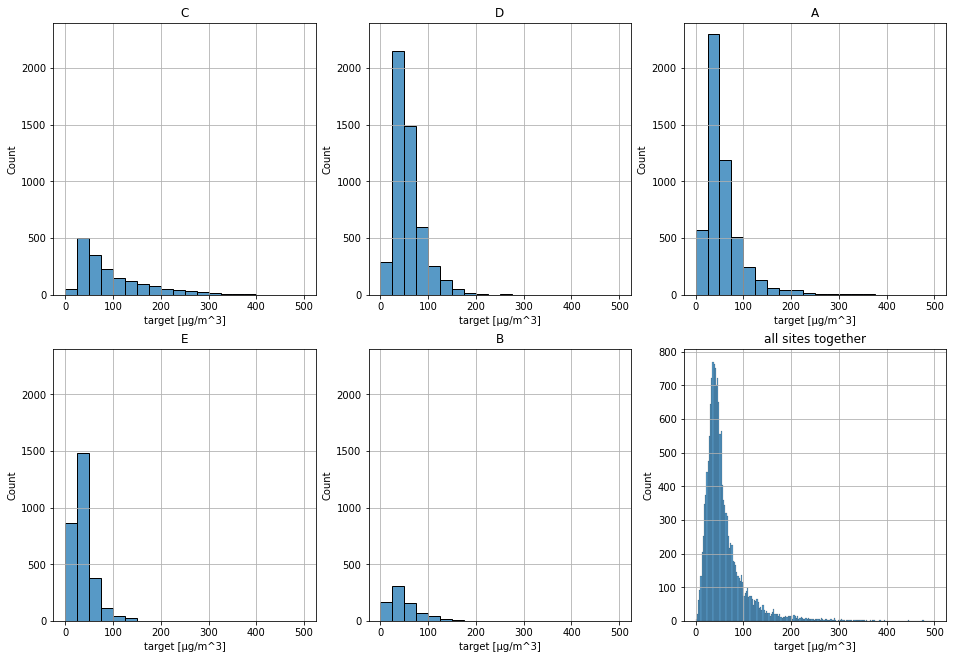

In [300]:
# look at histograms of target variable for the five different stations and aggregated over all five stations
# also print the respective number of observations
fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,11))
ax = np.reshape(ax,2*3)
bins = np.arange(0,501,25)

for i,site in enumerate(train_data['location'].unique()):
    print(f"site {site}: {len(train_data[train_data['location']==site])} observations")
    sns.histplot(x='target',data=train_data[train_data['location']==site],ax=ax[i],bins=bins)
    ax[i].set_title(site)
    ax[i].grid()
    ax[i].set_ylim([0,2400])
    ax[i].set_xlabel('target [µg/m^3]')
sns.histplot(x='target',data=train_data,ax=ax[-1],bins=np.arange(0,501,2.5))    
ax[-1].set_title('all sites together') 
ax[-1].grid() 
ax[-1].set_xlabel('target [µg/m^3]') 

Text(0.5, 1.0, 'data of all sites')

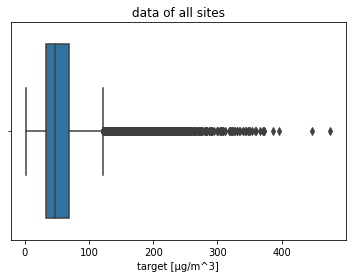

In [301]:
# distribution of aggregated target variable in boxplot
fig,ax = plt.subplots() 
sns.boxplot(x='target',data=train_data,ax=ax,orient='h')
ax.set_xlabel('target [µg/m^3]')
ax.set_title('data of all sites')
#upperbound = 1.5 * (train_data['target'].quantile(.75) - train_data['target'].quantile(.25)) + train_data['target'].quantile(.75)
#print(len(train_data[train_data['target']<upperbound]))
#print(len(train_data[train_data['target']>=upperbound]))


In [302]:
# calculate mean of feature dependent on lead day
for var in ['precip','temp','wind_dir','wind_spd','rel_humidity','atmos_press']:
    for ind_range in [(0,23),(24,47),(48,71),(72,95),(96,121)]:
        train_data = aggregate_features_advanced(train_data,var,ind_range[0],ind_range[1]) 

/Users/jeromesauer/neuefische/Project2_AirQuality/.venv/lib/python3.9/site-packages/pandas/core/apply.py:1099: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(


In [303]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   15539 non-null  object 
 1   location             15539 non-null  object 
 2   temp                 15539 non-null  object 
 3   precip               15539 non-null  object 
 4   rel_humidity         15539 non-null  object 
 5   wind_dir             15539 non-null  object 
 6   wind_spd             15539 non-null  object 
 7   atmos_press          15539 non-null  object 
 8   target               15539 non-null  float64
 9   mean_1_precip        15186 non-null  float64
 10  mean_2_precip        15219 non-null  float64
 11  mean_3_precip        15292 non-null  float64
 12  mean_4_precip        15281 non-null  float64
 13  mean_5_precip        15309 non-null  float64
 14  mean_1_temp          15228 non-null  float64
 15  mean_2_temp          15259 non-null 

In [304]:
train_data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,mean_1_precip,...,mean_1_rel_humidity,mean_2_rel_humidity,mean_3_rel_humidity,mean_4_rel_humidity,mean_5_rel_humidity,mean_1_atmos_press,mean_2_atmos_press,mean_3_atmos_press,mean_4_atmos_press,mean_5_atmos_press
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",45.126304,NaN,...,NaN,NaN,NaN,NaN,0.758530,NaN,NaN,NaN,NaN,87.752434
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,0.009208,...,0.775705,0.700826,0.754243,0.773507,0.784890,90.369062,90.370486,90.450347,90.422396,90.533033
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304,0.428000,...,0.805951,0.800447,0.663569,0.665576,0.636027,88.582014,88.496558,88.354410,88.381493,88.298433
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238,0.495292,...,0.891358,0.916266,0.902084,0.934652,0.849313,88.399340,88.258993,88.348125,88.487361,88.390200
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750,0.006375,...,0.773566,0.842458,0.809299,NaN,NaN,88.543090,88.536458,88.481553,NaN,NaN


In [305]:
train_data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,mean_1_precip,...,mean_1_rel_humidity,mean_2_rel_humidity,mean_3_rel_humidity,mean_4_rel_humidity,mean_5_rel_humidity,mean_1_atmos_press,mean_2_atmos_press,mean_3_atmos_press,mean_4_atmos_press,mean_5_atmos_press
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",45.126304,NaN,...,NaN,NaN,NaN,NaN,0.758530,NaN,NaN,NaN,NaN,87.752434
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,0.009208,...,0.775705,0.700826,0.754243,0.773507,0.784890,90.369062,90.370486,90.450347,90.422396,90.533033
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304,0.428000,...,0.805951,0.800447,0.663569,0.665576,0.636027,88.582014,88.496558,88.354410,88.381493,88.298433
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238,0.495292,...,0.891358,0.916266,0.902084,0.934652,0.849313,88.399340,88.258993,88.348125,88.487361,88.390200
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750,0.006375,...,0.773566,0.842458,0.809299,NaN,NaN,88.543090,88.536458,88.481553,NaN,NaN


In [306]:
# remove np.nan values in features and add columns with statistics
for col_name in ['temp','precip','rel_humidity','wind_dir','wind_spd']:
    #print(train_data[col_name])
    train_data[col_name] = train_data[col_name].apply(remove_nan_values)
    train_data = aggregate_features(train_data,col_name)   

In [307]:
train_data.dropna(inplace=True)

In [308]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14648 entries, 1 to 15538
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14648 non-null  object 
 1   location             14648 non-null  object 
 2   temp                 14648 non-null  object 
 3   precip               14648 non-null  object 
 4   rel_humidity         14648 non-null  object 
 5   wind_dir             14648 non-null  object 
 6   wind_spd             14648 non-null  object 
 7   atmos_press          14648 non-null  object 
 8   target               14648 non-null  float64
 9   mean_1_precip        14648 non-null  float64
 10  mean_2_precip        14648 non-null  float64
 11  mean_3_precip        14648 non-null  float64
 12  mean_4_precip        14648 non-null  float64
 13  mean_5_precip        14648 non-null  float64
 14  mean_1_temp          14648 non-null  float64
 15  mean_2_temp          14648 non-null 

In [309]:
# define features for modelling part
features = ['mean_temp','mean_precip','mean_rel_humidity','mean_wind_dir','mean_wind_spd']

0 mean_temp (14648,) float64
1 mean_precip (14648,) float64
2 mean_rel_humidity (14648,) float64
3 mean_wind_dir (14648,) float64
4 mean_wind_spd (14648,) float64


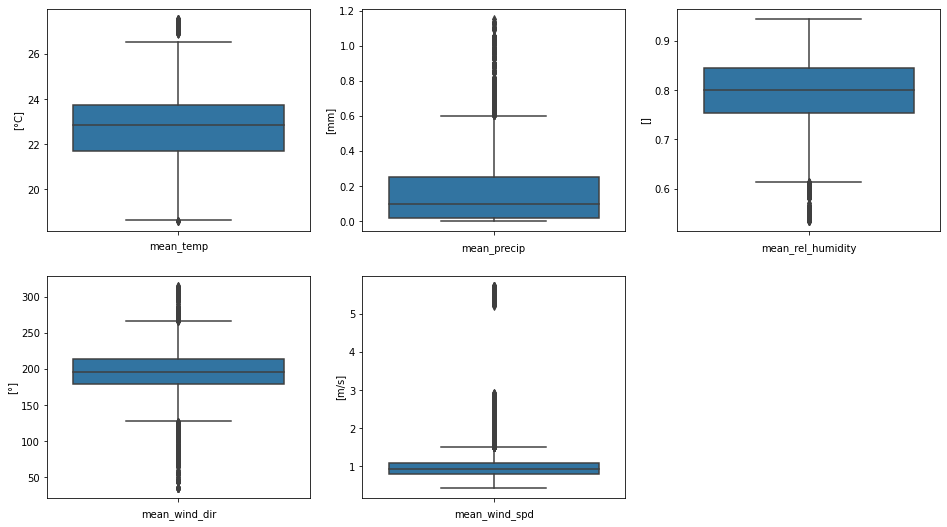

In [311]:
# look at distributions of mean features
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(16,9))
ax = np.reshape(ax,6)
units = ['[°C]','[mm]','[]','[°]','[m/s]']

for i,variable in enumerate(features):
    print(i,variable,train_data[variable].shape,train_data[variable].dtypes)
    sns.boxplot(y=train_data[variable],ax=ax[i]) 
    ax[i].set_xlabel(variable)
    ax[i].set_ylabel(units[i])
ax[-1].remove() 


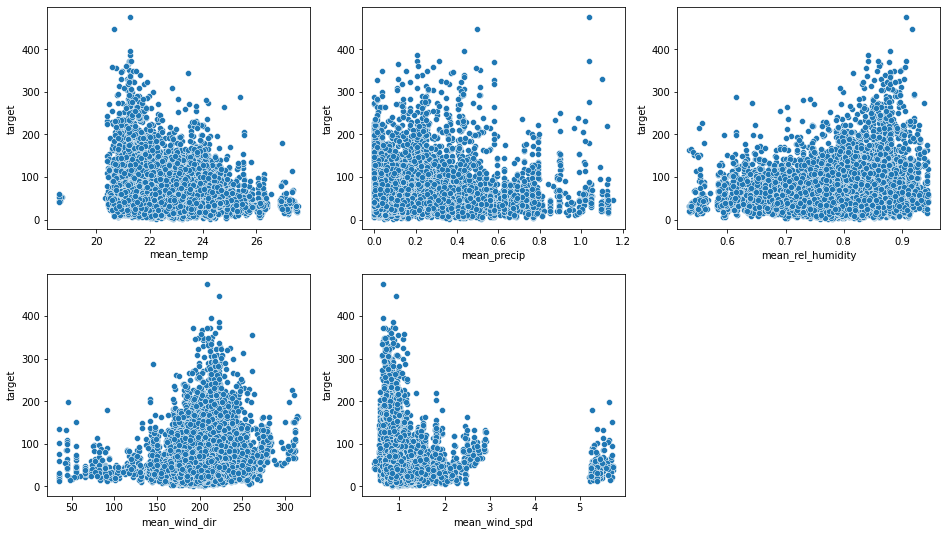

In [313]:
fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,9))
ax = np.reshape(ax,6)

for i,feature in enumerate(features):
    sns.scatterplot(x=train_data[feature], y=train_data['target'], ax=ax[i])
ax[-1].remove()    


In [314]:
# corelations between features and target variable
train_data[features + ['target']].corr()['target'].sort_values(ascending=False)



target               1.000000
mean_wind_dir        0.181979
mean_rel_humidity    0.110191
mean_precip          0.019629
mean_wind_spd       -0.146026
mean_temp           -0.183802
Name: target, dtype: float64

In [315]:
# export new train_data to csv. file
train_data[features + ['target']].to_csv('data/train_modelling.csv',index=False)